### Importing the necessary libraries

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense

### Modifying and preprocessing the dataset
This is done by filtering out irrelevant data.
A new column is also made called the tidal volume based on FVC (10% of FVC)
(Tidal volume is approximately 10% of FVC as stated by this website https://www.physio-pedia.com/Lung_Volumes)

In [12]:
df=pd.read_csv(r"/home/runcandel/Desktop/pclubsectask/lung capacity dataset.csv")
df=df.iloc[:,:26]
df=df.drop_duplicates(subset=["AWARE STUDY ID:"])
df=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,23]]
df["Tidal Volume(cc)"]=df["Baseline FVC (liters):"]*100
df.dropna()
df.tail()

,Calculated age (years):,Sex:,Race/ethnicity: (choice=White),Race/ethnicity: (choice=Black / African American),Race/ethnicity: (choice=Hispanic / Latino),Race/ethnicity: (choice=Asian),Race/ethnicity: (choice=Other),Height (cm):,Weight (kg):,Participant:,Baseline FVC (liters):,Tidal Volume(cc)
1039,25.1,Female,Checked,Unchecked,Unchecked,Unchecked,Unchecked,162.0,80.0,Control / healthy / no pulmonary disease,3.51,351.0
1043,7.7,Female,Checked,Unchecked,Unchecked,Unchecked,Unchecked,125.5,32.3,Asthma,2.09,209.0
1045,16.2,Male,Unchecked,Checked,Unchecked,Unchecked,Unchecked,167.5,86.1,Asthma,4.66,466.0
1046,11.6,Male,Unchecked,Checked,Unchecked,Unchecked,Unchecked,149.5,57.3,Asthma,2.57,257.0
1053,18.0,Male,Unchecked,Checked,Unchecked,Unchecked,Unchecked,177.2,100.9,Asthma,3.68,368.0


In [13]:
g=df["Baseline FVC (liters):"].isna().to_numpy()
g=True^g
df=df.iloc[g]

In [14]:
df["Participant:"].array.unique()

<NumpyExtensionArray>
['Control / healthy / no pulmonary disease', 'CF', 'Asthma', 'Other', 'COPD']
Length: 5, dtype: object

In [15]:
for i in ['Race/ethnicity: (choice=White)',
       'Race/ethnicity: (choice=Black / African American)',
       'Race/ethnicity: (choice=Hispanic / Latino)',
       'Race/ethnicity: (choice=Asian)', 'Race/ethnicity: (choice=Other)']:
    df[i]=df[i].apply(lambda x: True if x=="Checked" else False)
    df[i]=df[i].astype('bool')
df = pd.get_dummies(df, columns=["Participant:"], prefix='', prefix_sep='')
df["Sex:"]=df["Sex:"].apply(lambda x: 1 if x=="Male" else 0)
df["Sex:"]=df["Sex:"].astype("int")
df=df.drop(columns=["Baseline FVC (liters):"])



In [16]:
df.head()

,Calculated age (years):,Sex:,Race/ethnicity: (choice=White),Race/ethnicity: (choice=Black / African American),Race/ethnicity: (choice=Hispanic / Latino),Race/ethnicity: (choice=Asian),Race/ethnicity: (choice=Other),Height (cm):,Weight (kg):,Tidal Volume(cc),Asthma,CF,COPD,Control / healthy / no pulmonary disease,Other
0,30.7,0,True,False,False,False,False,160.02,80.0,334.0,False,False,False,True,False
4,19.6,0,True,True,False,False,False,152.40,50.6,352.0,False,True,False,False,False
8,21.1,0,True,True,False,False,False,172.20,70.9,471.0,False,True,False,False,False
12,15.2,0,False,True,False,False,False,160.30,54.2,261.0,True,False,False,False,False
19,55.7,0,True,False,False,False,False,168.00,70.0,300.0,True,False,False,False,False


##### Checking the correlation matrix 
The correlation matrix shows that height and weight are the most prominent factors

In [17]:
df.corr()

,Calculated age (years):,Sex:,Race/ethnicity: (choice=White),Race/ethnicity: (choice=Black / African American),Race/ethnicity: (choice=Hispanic / Latino),Race/ethnicity: (choice=Asian),Race/ethnicity: (choice=Other),Height (cm):,Weight (kg):,Tidal Volume(cc),Asthma,CF,COPD,Control / healthy / no pulmonary disease,Other
Calculated age (years):,1.000000,-0.186181,-0.015083,0.006679,0.002943,-0.074775,-0.058563,0.422904,0.420433,0.197386,-0.296396,-0.112172,0.240368,0.393952,-0.052296
Sex:,-0.186181,1.000000,0.044680,-0.085275,-0.049688,0.052888,0.007741,0.136818,0.024160,0.284228,0.151247,-0.033836,0.007741,-0.136490,-0.012519
Race/ethnicity: (choice=White),-0.015083,0.044680,1.000000,-0.834171,0.030353,-0.235051,-0.140548,-0.012387,-0.110458,0.165909,-0.279688,0.216603,0.042991,0.101538,0.068285
Race/ethnicity: (choice=Black / African American),0.006679,-0.085275,-0.834171,1.000000,-0.030861,-0.057758,-0.043710,0.017122,0.150351,-0.143119,0.262729,-0.165578,-0.043710,-0.125121,-0.069428
Race/ethnicity: (choice=Hispanic / Latino),0.002943,-0.049688,0.030353,-0.030861,1.000000,-0.009657,-0.004266,0.029242,0.024143,0.062412,-0.056726,-0.025205,-0.004266,0.086232,-0.006776
Race/ethnicity: (choice=Asian),-0.074775,0.052888,-0.235051,-0.057758,-0.009657,1.000000,-0.013677,-0.049671,-0.098172,-0.065332,0.029395,-0.034412,-0.013677,0.004549,-0.021724
Race/ethnicity: (choice=Other),-0.058563,0.007741,-0.140548,-0.043710,-0.004266,-0.013677,1.000000,-0.106991,-0.065372,-0.072284,0.075206,-0.035698,-0.006042,-0.049472,-0.009597
Height (cm):,0.422904,0.136818,-0.012387,0.017122,0.029242,-0.049671,-0.106991,1.000000,0.695597,0.829087,-0.103878,-0.069042,0.047600,0.164770,-0.001790
Weight (kg):,0.420433,0.024160,-0.110458,0.150351,0.024143,-0.098172,-0.065372,0.695597,1.000000,0.556780,0.064075,-0.193782,0.026327,0.101110,-0.052299
Tidal Volume(cc),0.197386,0.284228,0.165909,-0.143119,0.062412,-0.065332,-0.072284,0.829087,0.556780,1.000000,-0.133082,0.060366,-0.006290,0.116755,-0.072277


Preparing the test and training data

In [18]:
df=df.sample(frac=1,random_state=545445363,ignore_index=True)
trainf=df.iloc[:300,[0,1,2,3,4,5,6,7,8,10,11,12,13,14]]
testf=df.iloc[300:,[0,1,2,3,4,5,6,7,8,10,11,12,13,14]]
trainl=df.iloc[:300,9]
testl=df.iloc[300:,9]

### Prepeared 3 models
##### 1. A linear regression model with all parameters
##### 2. A neural network with all parameters
##### 3. A neural network with selected parameters


In [19]:
model=tf.keras.Sequential([tf.keras.layers.Dense(units=1)])
model.compile(loss="mean_absolute_error",optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))
history=model.fit(trainf,trainl,validation_split=0.1,epochs=1500)

Epoch 1/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 398.0711 - val_loss: 392.4398
Epoch 2/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 385.6895 - val_loss: 380.8308
Epoch 3/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 373.6388 - val_loss: 369.2284
Epoch 4/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 359.7104 - val_loss: 357.6508
Epoch 5/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 347.6240 - val_loss: 346.0339
Epoch 6/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 344.8772 - val_loss: 334.4079
Epoch 7/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 338.3056 - val_loss: 322.7572
Epoch 8/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 315.8227 - val_loss: 311.2101
Epoch 9/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 307.6806 - val_loss: 299.5990
Epoch 10/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 293.5818 - val_loss: 288.0054
Epoch 11/1500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 280.6981 - val_loss: 276.4038
Epoch 12/1500
9/9 ━━━━━━━━━━━

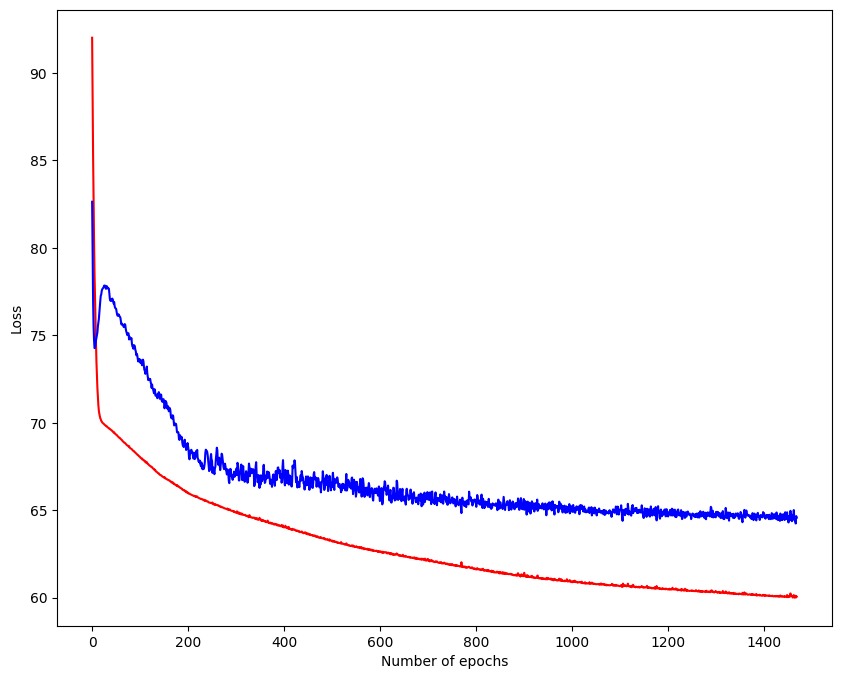

In [20]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'][30:],label='Training loss',color='red')
plt.plot(history.history['val_loss'][30:],label='Validation loss',color='blue')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

In [24]:
model2=tf.keras.Sequential()
model2.add(Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model2.add(Dense(units=12,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model2.add(Dense(units=1,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model2.compile(loss="mean_absolute_error",optimizer=tf.keras.optimizers.Adam(learning_rate=0.003))
history2=model2.fit(trainf,trainl,validation_split=0.1,epochs=600)

Epoch 1/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 339.1953 - val_loss: 339.1693
Epoch 2/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 335.9219 - val_loss: 314.7884
Epoch 3/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 305.9264 - val_loss: 290.6433
Epoch 4/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 282.4639 - val_loss: 265.2609
Epoch 5/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 265.4144 - val_loss: 237.9331
Epoch 6/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 237.0263 - val_loss: 206.3892
Epoch 7/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 203.2803 - val_loss: 168.7982
Epoch 8/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156.0564 - val_loss: 123.9086
Epoch 9/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 112.9322 - val_loss: 81.2729
Epoch 10/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.3788 - val_loss: 75.2311
Epoch 11/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.4222 - val_loss: 86.5772
Epoch 12/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [25]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725 (2.84 KB)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 484 (1.89 KB)

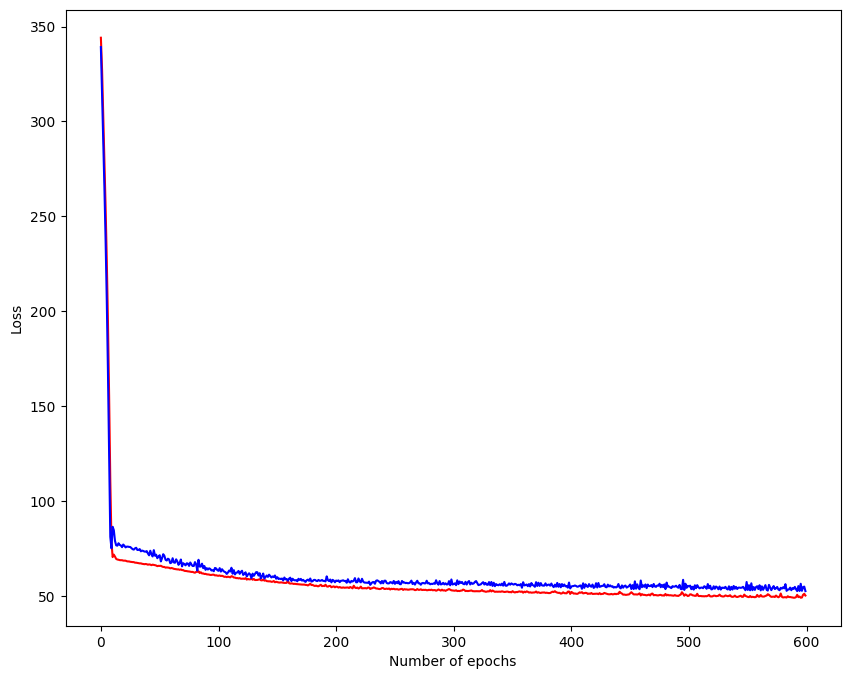

In [26]:
plt.figure(figsize=(10,8))
plt.plot(history2.history['loss'],label='Training loss',color='red')
plt.plot(history2.history['val_loss'],label='Validation loss',color='blue')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

In [27]:
model.save('ltm1.keras')
model2.save('ltm2.keras')

In [28]:
train2f=df.iloc[:300,[0,7,8]]
test2f=df.iloc[300:,[0,7,8]]
train2l=df.iloc[:300,9]
test2l=df.iloc[300:,9]

In [30]:
model3=tf.keras.Sequential()
model3.add(Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model3.add(Dense(units=12,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model3.add(Dense(units=1,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.005)))
model3.compile(loss="mean_absolute_error",optimizer=tf.keras.optimizers.Adam(learning_rate=0.003))
history3=model3.fit(train2f,train2l,validation_split=0.1,epochs=600)

Epoch 1/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 342.1608 - val_loss: 338.9748
Epoch 2/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 342.8126 - val_loss: 327.9657
Epoch 3/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 330.0580 - val_loss: 312.9848
Epoch 4/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 308.5332 - val_loss: 293.7651
Epoch 5/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 285.2484 - val_loss: 269.5956
Epoch 6/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255.3835 - val_loss: 237.8255
Epoch 7/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 218.3481 - val_loss: 196.9479
Epoch 8/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 187.3489 - val_loss: 145.3018
Epoch 9/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 136.7888 - val_loss: 92.6603
Epoch 10/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90.7744 - val_loss: 69.9102
Epoch 11/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 70.5810 - val_loss: 85.9083
Epoch 12/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

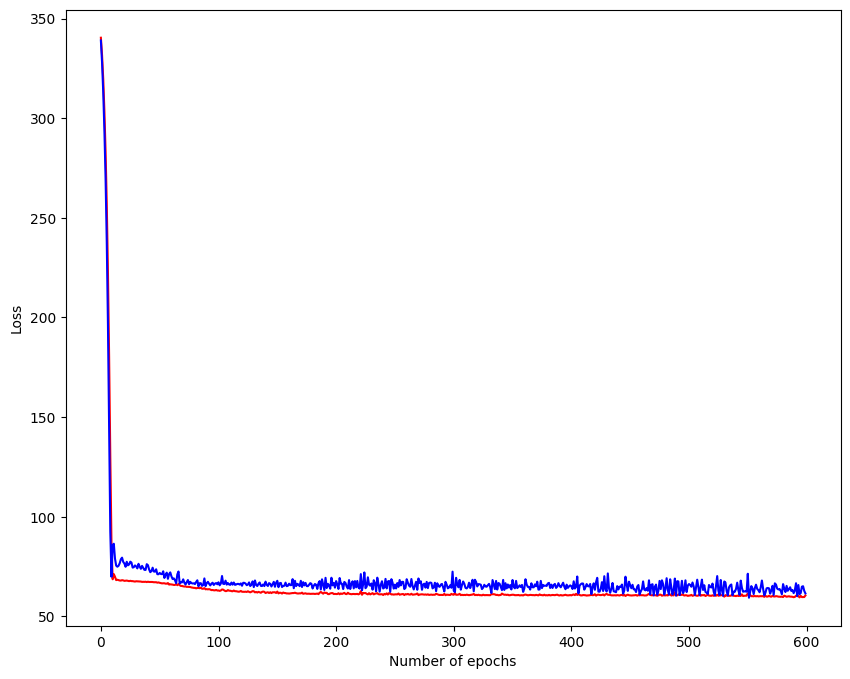

In [32]:
plt.figure(figsize=(10,8))
plt.plot(history3.history['loss'],label='Training loss',color='red')
plt.plot(history3.history['val_loss'],label='Validation loss',color='blue')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

In [33]:
model3.save('ltm3.keras')